In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
# Set random seed for reproducibility
np.random.seed(25)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Generate 20 highly correlated random variables, each with 100 observations
n_samples, n_features = 100, 20 

The dataset will have 100 observations (rows).
The dataset will have 20 features (columns).

In [4]:
base_X = np.random.randn(n_samples, 5)  # Generate 5 independent features

Generates a 100 × 5 matrix where each column is independently drawn from a standard normal distribution (mean = 0, variance = 1).

In [5]:
base_X = np.random.randn(n_samples, 5)  # Generate 5 independent features
X = np.hstack([base_X + np.random.randn(n_samples, 1) * 0.1 for _ in range(4)])  # Create correlated features

Since base_X has 5 features and we iterate 4 times, the result will be a 100 × 20 matrix (each of the 5 base features is copied 4 times with small variations, leading to 20 columns in total).

In [7]:
X = np.hstack([X, np.random.randn(n_samples, n_features - X.shape[1])])  # Add some independent features

np.random.randn(n_samples, n_features - X.shape[1]) creates any remaining independent features, but since X is already of size 100×20, this part doesn't add new features (it's effectively ignored)

In [8]:
# True coefficients: only 10 variables contribute to the outcome
true_coef = np.zeros(n_features)
true_coef[:10] = np.random.randn(10)  # First 10 variables have nonzero weights

# Generate the response variable with some noise
y = X @ true_coef + np.random.randn(n_samples) * 0.5  # Add Gaussian noise


The resulting y is a 100 × 1 vector representing the dependent variable

In [10]:
# print out the true coefficients
print(f'True coefficients: {true_coef}')

True coefficients: [-1.11337573 -1.16940215  0.68053889 -1.53421193  1.6538174  -1.29518139
 -0.56682573  0.4770138   1.41337125  0.51710475  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


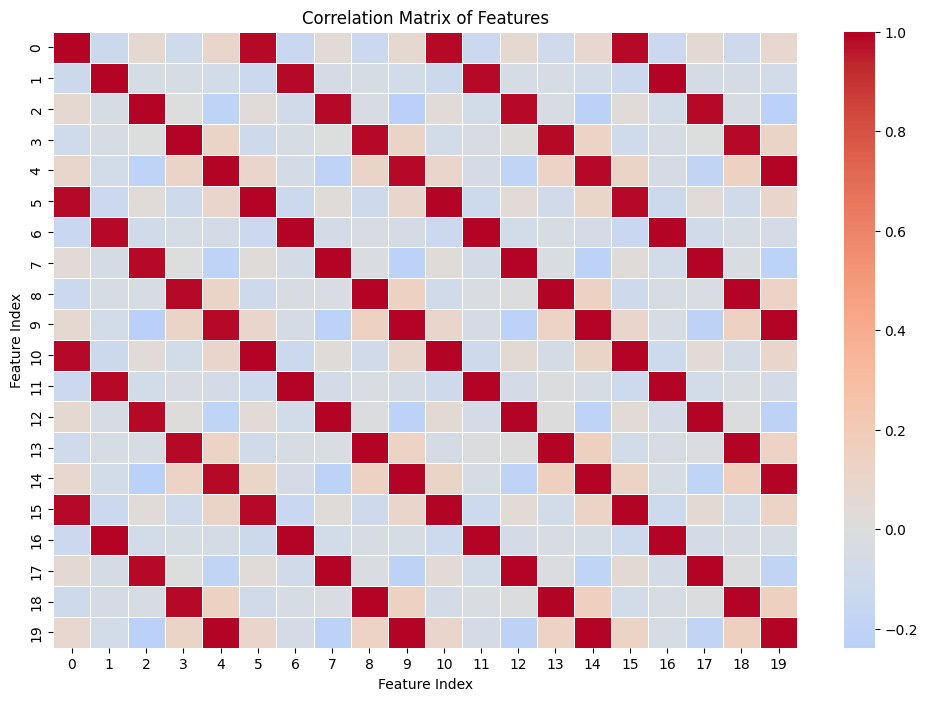

In [11]:
# Compute correlation matrix
corr_matrix = np.corrcoef(X, rowvar=False)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
plt.show()

The correlogram above is essentially a graphical representation of multicollinearity. This is pretty cool to look at.

In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit OLS model
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_pred = ols.predict(X_test)
ols_mse = mean_squared_error(y_test, ols_pred)


In [13]:
ols_mse

0.2459813440013462

In [25]:
# Fit Ridge Regression with cross-validation
alphas = np.logspace(-4, 10, 100) 

Above we called the shrinkage parameter `alphas`. In the lecture notes this was referred to as $\lambda$.

- np.logspace(-4, 4, 100): Generates 100 values of alpha (regularization strength) logarithmically spaced between 10⁻⁴ (0.0001) and 10⁴ (10,000).

- Small alpha values → Ridge behaves like OLS (no regularization).
- Large alpha values → Shrinks coefficients more aggressively.

In [26]:
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)  # bt default, RidgeCV uses Leave-One-Out CV.Also, store_cv_values=True is only compatible with cv=None
ridge_cv.fit(X_train, y_train)

# Best alpha and its performance
best_alpha = ridge_cv.alpha_
ridge_pred = ridge_cv.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Print results
print(f'Best alpha for Ridge: {best_alpha}')
print(f'OLS MSE: {ols_mse:.4f}')
print(f'Ridge MSE: {ridge_mse:.4f}')

Best alpha for Ridge: 0.6579332246575675
OLS MSE: 0.2460
Ridge MSE: 0.2401


Why Use Ridge Regression?
- Handles Multicollinearity: Ridge helps when features are highly correlated (as in your dataset).
- Reduces Overfitting: By adding a penalty on large coefficients, Ridge prevents the model from memorizing noise.
- Improves Generalization: Often performs better on test data compared to OLS in cases with many correlated features.

In [27]:
# Get the cross-validation errors
cv_errors = np.mean(ridge_cv.cv_values_, axis=0)

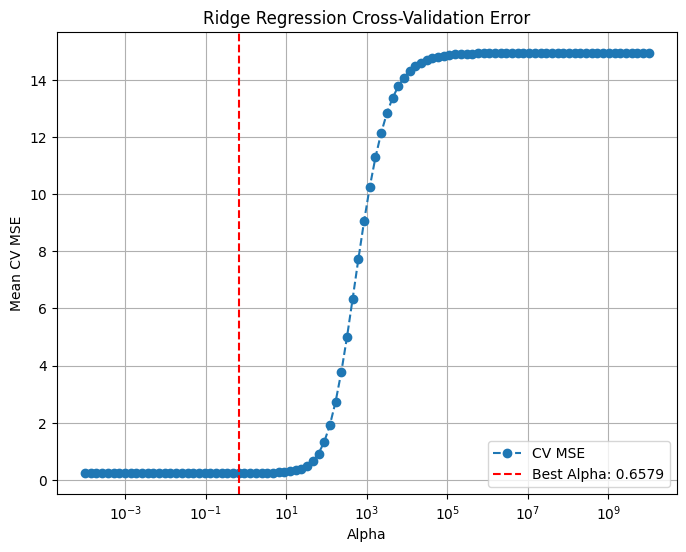

In [28]:
# Get the best alpha from RidgeCV
best_alpha = ridge_cv.alpha_

# Plot the CV error for different alphas
plt.figure(figsize=(8, 6))
plt.plot(alphas, cv_errors, marker='o', linestyle='dashed', label="CV MSE")
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best Alpha: {best_alpha:.4f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean CV MSE')
plt.title('Ridge Regression Cross-Validation Error')
plt.legend()
plt.grid(True)
plt.show()


The key punchline for any data science problem, is to first identify whether you're dealing with a classification or a regression problem. If you have a classification problem, you use the logistic regression as a baseline and can use more complex model from there. If you're dealing with a regression problem, you can use the OLS as a baseline and then use more advanced models like Ridge Regression or LASSO, which can be used for both classification and regression problems. 